<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/profile_python_codes_performance_2_sameasbatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/erichson/koopmanAE/

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
!ls -lt

total 4
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


In [ ]:
!wget https://raw.githubusercontent.com/erichson/koopmanAE/master/model.py
!wget https://raw.githubusercontent.com/erichson/koopmanAE/master/tools.py
!wget https://raw.githubusercontent.com/erichson/koopmanAE/master/train.py
!wget https://raw.githubusercontent.com/erichson/koopmanAE/master/read_dataset.py

--2022-01-25 02:00:49--  https://raw.githubusercontent.com/erichson/koopmanAE/master/model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3648 (3.6K) [text/plain]
Saving to: ‘model.py’

model.py            100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-01-25 02:00:49 (45.7 MB/s) - ‘model.py’ saved [3648/3648]

--2022-01-25 02:00:49--  https://raw.githubusercontent.com/erichson/koopmanAE/master/tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1134 (1.1K) [text/plain]
Saving to: ‘tools.py’

tools.py   

In [ ]:
!ls -lt

total 24
-rw-r--r-- 1 root root 3746 Jan 25 02:00 read_dataset.py
-rw-r--r-- 1 root root 4763 Jan 25 02:00 train.py
-rw-r--r-- 1 root root 1134 Jan 25 02:00 tools.py
-rw-r--r-- 1 root root 3648 Jan 25 02:00 model.py
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


In [ ]:
import os
import sys
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
# import argparse

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset

import torch.nn.init as init

from read_dataset import data_from_name
from model import *
from tools import *
from train import *

#==============================================================================
# Training settings
#==============================================================================
# parser = argparse.ArgumentParser(description='PyTorch Example')
# #
# parser.add_argument('--model', type=str, default='koopmanAE', metavar='N', help='model')
# #
# parser.add_argument('--alpha', type=int, default='1',  help='model width')
# #
# parser.add_argument('--dataset', type=str, default='flow_noisy', metavar='N', help='dataset')
# #
# parser.add_argument('--theta', type=float, default=2.4,  metavar='N', help='angular displacement')
# #
# parser.add_argument('--noise', type=float, default=0.0,  metavar='N', help='noise level')
# #
# parser.add_argument('--lr', type=float, default=1e-2, metavar='N', help='learning rate (default: 0.01)')
# #
# parser.add_argument('--wd', type=float, default=0.0, metavar='N', help='weight_decay (default: 1e-5)')
# #
# parser.add_argument('--epochs', type=int, default=600, metavar='N', help='number of epochs to train (default: 10)')
# #
# parser.add_argument('--batch', type=int, default=64, metavar='N', help='batch size (default: 10000)')
# #
# parser.add_argument('--batch_test', type=int, default=200, metavar='N', help='batch size  for test set (default: 10000)')
# #
# parser.add_argument('--plotting', type=bool, default=True, metavar='N', help='number of epochs to train (default: 10)')
# #
# parser.add_argument('--folder', type=str, default='test',  help='specify directory to print results to')
# #
# parser.add_argument('--lamb', type=float, default='1',  help='balance between reconstruction and prediction loss')
# #
# parser.add_argument('--nu', type=float, default='1e-1',  help='tune backward loss')
# #
# parser.add_argument('--eta', type=float, default='1e-2',  help='tune consistent loss')
# #
# parser.add_argument('--steps', type=int, default='8',  help='steps for learning forward dynamics')
# #
# parser.add_argument('--steps_back', type=int, default='8',  help='steps for learning backwards dynamics')
# #
# parser.add_argument('--bottleneck', type=int, default='6',  help='size of bottleneck layer')
# #
# parser.add_argument('--lr_update', type=int, nargs='+', default=[30, 200, 400, 500], help='decrease learning rate at these epochs')
# #
# parser.add_argument('--lr_decay', type=float, default='0.2',  help='PCL penalty lambda hyperparameter')
# #
# parser.add_argument('--backward', type=int, default=0, help='train with backward dynamics')
# #
# parser.add_argument('--init_scale', type=float, default=0.99, help='init scaling')
# #
# parser.add_argument('--gradclip', type=float, default=0.05, help='gradient clipping')
# #
# parser.add_argument('--pred_steps', type=int, default='1000',  help='prediction steps')
# #
# parser.add_argument('--seed', type=int, default='1',  help='seed value')
# #


# args = parser.parse_args()

In [ ]:
seed=1
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.cuda.manual_seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
set_seed(seed)
device = get_device()

Using the CPU


In [ ]:
#******************************************************************************
# Create folder to save results
#******************************************************************************
folder='results_pendulum'
if not os.path.isdir(folder):
    os.mkdir(folder)

In [ ]:
!ls -lt

total 32
drwxr-xr-x 2 root root 4096 Jan 25 02:01 results_pendulum
drwxr-xr-x 2 root root 4096 Jan 25 02:01 __pycache__
-rw-r--r-- 1 root root 3746 Jan 25 02:00 read_dataset.py
-rw-r--r-- 1 root root 4763 Jan 25 02:00 train.py
-rw-r--r-- 1 root root 1134 Jan 25 02:00 tools.py
-rw-r--r-- 1 root root 3648 Jan 25 02:00 model.py
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


In [ ]:
#******************************************************************************
# load data
#******************************************************************************
dataset='pendulum'
Xtrain, Xtest, Xtrain_clean, Xtest_clean, m, n = data_from_name(dataset, noise=0., theta=2.4)

In [ ]:
Xtrain.shape, Xtest.shape, Xtrain_clean.shape, Xtest_clean.shape, m , n

((600, 64), (1600, 64), (600, 64), (1600, 64), 64, 1)

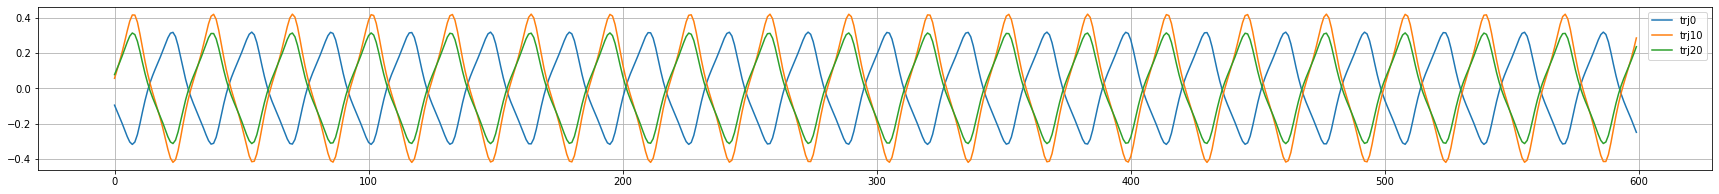

In [ ]:
df_train=pd.DataFrame(Xtrain, columns=['trj'+str(i) for i in range(Xtrain.shape[1])])
df_train.plot.line(use_index=True, y=['trj0','trj10','trj20'], figsize=(30,3), grid=True)

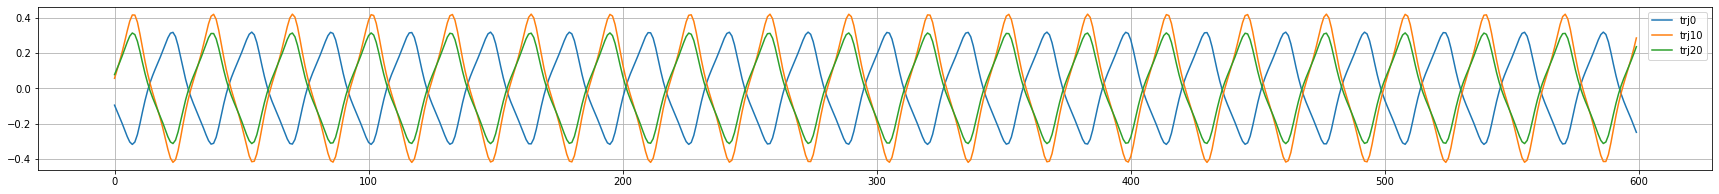

In [ ]:
df_train_clean=pd.DataFrame(Xtrain_clean, columns=['trj'+str(i) for i in range(Xtrain_clean.shape[1])])
df_train_clean.plot.line(use_index=True, y=['trj0','trj10','trj20'], figsize=(30,3), grid=True)

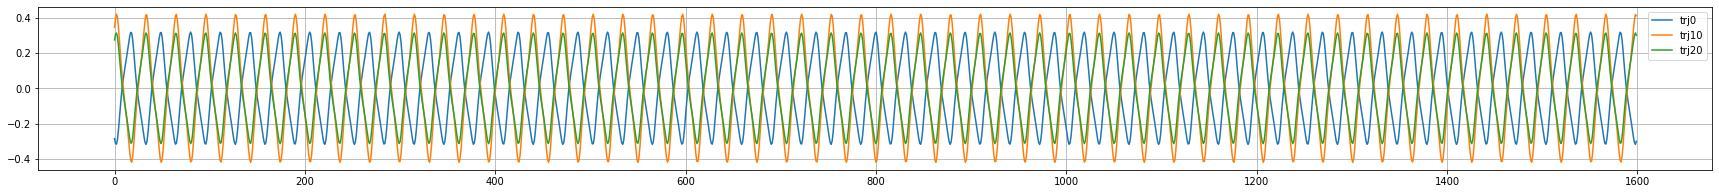

In [ ]:
df_test=pd.DataFrame(Xtest, columns=['trj'+str(i) for i in range(Xtest.shape[1])])
df_test.plot.line(use_index=True, y=['trj0','trj10','trj20'], figsize=(30,3), grid=True)

In [ ]:

#******************************************************************************
# Reshape data for pytorch into 4D tensor Samples x Channels x Width x Hight
#******************************************************************************
Xtrain = add_channels(Xtrain)
Xtest = add_channels(Xtest)

# transfer to tensor
Xtrain = torch.from_numpy(Xtrain).float().contiguous()
Xtest = torch.from_numpy(Xtest).float().contiguous()

In [ ]:
Xtrain.shape

torch.Size([600, 1, 64, 1])

In [ ]:
#******************************************************************************
# Create Dataloader objects
#******************************************************************************
steps = 8
batch = 64
trainDat = []
start = 0
for i in np.arange(steps,-1, -1):
    if i == 0:
        trainDat.append(Xtrain[start:].float())
    else:
        trainDat.append(Xtrain[start:-i].float())
    start += 1

train_data = torch.utils.data.TensorDataset(*trainDat)
del(trainDat)

train_loader = DataLoader(dataset = train_data,
                              batch_size = batch,
                              shuffle = True)

In [ ]:
# dataiter = iter(train_loader)
# XXX = dataiter.next()
# print(len(XXX[0][0][0]))


In [ ]:
bottleneck = 6
steps_back = 8
alpha = 1
init_scale = 0.99
#==============================================================================
# Model
#==============================================================================
print(Xtrain.shape)
model = koopmanAE(m, n, bottleneck, steps, steps_back, alpha, init_scale)
print('koopmanAE')
#model = torch.nn.DataParallel(model)
model = model.to(device)

#==============================================================================
# Model summary
#==============================================================================
print('**** Setup ****')
print('Total params: %.2fM' % (sum(p.numel() for p in model.parameters())/1000000.0))
print('Total params: %.2fk' % (sum(p.numel() for p in model.parameters())/1000.0))
print('************')
print(model)

torch.Size([600, 1, 64, 1])
koopmanAE
**** Setup ****
Total params: 0.00M
Total params: 2.96k
************
koopmanAE(
  (encoder): encoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=64, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=6, bias=True)
  )
  (dynamics): dynamics(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (backdynamics): dynamics_back(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (decoder): decoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=6, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=64, bias=True)
  )
)


In [ ]:
torch.save(model.state_dict(), 'model_init'+'.pkl')

In [ ]:
!ls -lt

total 48
-rw-r--r-- 1 root root 16059 Jan 23 22:53 model_init.pkl
drwxr-xr-x 2 root root  4096 Jan 23 22:53 results_pendulum
drwxr-xr-x 2 root root  4096 Jan 23 22:53 __pycache__
-rw-r--r-- 1 root root  3746 Jan 23 22:53 read_dataset.py
-rw-r--r-- 1 root root  4763 Jan 23 22:53 train.py
-rw-r--r-- 1 root root  1134 Jan 23 22:53 tools.py
-rw-r--r-- 1 root root  3648 Jan 23 22:53 model.py
drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data


In [ ]:
lr = 1e-2
wd = 0.0
lamb = 1.
epochs = 600 
lr_decay = 0.2
lr_update = [30, 200, 400, 500]
nu = 1e-1
eta = 1e-2
backward = 0
steps_back = 8.
gradclip = 0.05
#==============================================================================
# Start training
#==============================================================================
model, optimizer, epoch_hist = train(model, train_loader,
                    lr=lr, weight_decay=wd, lamb=lamb, num_epochs = epochs,
                    learning_rate_change=lr_decay, epoch_update=lr_update,
                    nu = nu, eta = eta, backward=backward, steps=steps, steps_back=steps_back,
                    gradclip=gradclip)


torch.save(model.state_dict(), folder + '/model'+'.pkl')

Using the CPU
********** Epoche 1 **********
loss identity:  0.19808429479599
loss forward:  0.4145815074443817
loss sum:  0.6126657724380493
[1.05 0.838 0.834 0.834 0.871 0.871]
********** Epoche 21 **********
loss identity:  0.0020060355309396982
loss forward:  0.0019082038197666407
loss sum:  0.003914239350706339
[0.603 0.72 0.72 1.01 1.01 0.629]
********** Epoche 41 **********
loss identity:  0.00010264703450957313
loss forward:  0.00025078767794184387
loss sum:  0.0003534347051754594
[0.603 0.716 0.716 1.01 1.01 0.611]
********** Epoche 61 **********
loss identity:  7.756649574730545e-05
loss forward:  0.00015832972712814808
loss sum:  0.00023589622287545353
[0.604 0.714 0.714 1.01 1.01 0.611]
********** Epoche 81 **********
loss identity:  0.00010170062887482345
loss forward:  0.00010673410724848509
loss sum:  0.00020843473612330854
[0.604 0.712 0.712 1 1 0.61]
********** Epoche 101 **********
loss identity:  0.00013857235899195075
loss forward:  0.00014247307262849063
loss sum: 

In [ ]:
pred_steps = 1000
#******************************************************************************
# Prediction
#******************************************************************************
Xinput, Xtarget = Xtest[:-1], Xtest[1:]
_, Xtarget = Xtest_clean[:-1], Xtest_clean[1:]


snapshots_pred = []
snapshots_truth = []


error = []
for i in range(30):
            error_temp = []
            init = Xinput[i].float().to(device)
            if i == 0:
                init0 = init
            
            z = model.encoder(init) # embedd data in latent space

            for j in range(pred_steps):
                if isinstance(z, tuple):
                    z = model.dynamics(*z) # evolve system in time
                else:
                    z = model.dynamics(z)
                if isinstance(z, tuple):
                    x_pred = model.decoder(z[0])
                else:
                    x_pred = model.decoder(z) # map back to high-dimensional space
                target_temp = Xtarget[i+j].data.cpu().numpy().reshape(m,n)
                error_temp.append(np.linalg.norm(x_pred.data.cpu().numpy().reshape(m,n) - target_temp) / np.linalg.norm(target_temp))
                
                if i == 0:
                    snapshots_pred.append(x_pred.data.cpu().numpy().reshape(m,n))
                    snapshots_truth.append(target_temp)
 
            error.append(np.asarray(error_temp))



error = np.asarray(error)

fig = plt.figure(figsize=(15,12))
plt.plot(error.mean(axis=0), 'o--', lw=3, label='', color='#377eb8')
plt.fill_between(x=range(error.shape[1]),y1=np.quantile(error, .05, axis=0), y2=np.quantile(error, .95, axis=0), color='#377eb8', alpha=0.2)

plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=10)

plt.ylabel('Relative prediction error', fontsize=22)
plt.xlabel('Time step', fontsize=22)
plt.grid(False)
#plt.yscale("log")
plt.ylim([0.0,error.max()*2])
#plt.legend(fontsize=22)
fig.tight_layout()
plt.savefig(folder +'/000prediction' +'.png')
#plt.savefig(args.folder +'/000prediction' +'.eps')

plt.close()

np.save(folder +'/000_pred.npy', error)

print('Average error of first pred: ', error.mean(axis=0)[0])
print('Average error of last pred: ', error.mean(axis=0)[-1])
print('Average error overarll pred: ', np.mean(error.mean(axis=0)))



Average error of first pred:  0.0057405797
Average error of last pred:  0.31067008
Average error overarll pred:  0.17306152


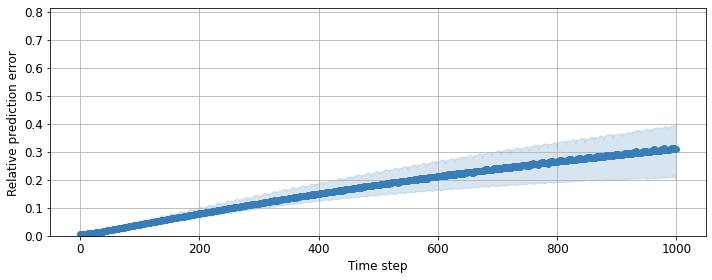

In [ ]:

fig = plt.figure(figsize=(10,4))
plt.plot(error.mean(axis=0), 'o--', lw=3, label='', color='#377eb8')
plt.fill_between(x=range(error.shape[1]),y1=np.quantile(error, .05, axis=0), y2=np.quantile(error, .95, axis=0), color='#377eb8', alpha=0.2)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=10)

plt.ylabel('Relative prediction error', fontsize=12)
plt.xlabel('Time step', fontsize=12)
plt.grid()
#plt.yscale("log")
plt.ylim([0.0,error.max()*2])
#plt.legend(fontsize=22)
fig.tight_layout()

In [ ]:
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])

In [ ]:
# for i, key in enumerate(model.state_dict().keys()):
#   print (key)

In [ ]:
seed=1
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.cuda.manual_seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
set_seed(seed)
device = get_device()

Using the CPU


In [ ]:
bottleneck = 6
steps_back = 8
alpha = 1
init_scale = 0.99
#==============================================================================
# Model
#==============================================================================
print(Xtrain.shape)

model = koopmanAE(m, n, bottleneck, steps, steps_back, alpha, init_scale)
print('koopmanAE')
#model = torch.nn.DataParallel(model)
model.load_state_dict(torch.load('model_init.pkl'))
model = model.to(device)
# model.load_state_dict(init_wts)

#==============================================================================
# Model summary
#==============================================================================
print('**** Setup ****')
print('Total params: %.2fM' % (sum(p.numel() for p in model.parameters())/1000000.0))
print('Total params: %.2fk' % (sum(p.numel() for p in model.parameters())/1000.0))
print('************')
print(model)
# print(model.state_dict())


torch.Size([600, 1, 64, 1])
koopmanAE
**** Setup ****
Total params: 0.00M
Total params: 2.96k
************
koopmanAE(
  (encoder): encoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=64, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=6, bias=True)
  )
  (dynamics): dynamics(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (backdynamics): dynamics_back(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (decoder): decoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=6, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=64, bias=True)
  )
)


In [ ]:
folder='results_back_pendulum'
backward=1
if not os.path.isdir(folder):
    os.mkdir(folder)

In [ ]:
lr = 1e-2
wd = 0.0
lamb = 1.
epochs = 600 
lr_decay = 0.2
lr_update = [30, 200, 400, 500]
nu = 1e-1
eta = 1e-2
# backward = 0
steps_back = 8
gradclip = 0.05
#==============================================================================
# Start training
#==============================================================================
model, optimizer, epoch_hist = train(model, train_loader,
                    lr=lr, weight_decay=wd, lamb=lamb, num_epochs = epochs,
                    learning_rate_change=lr_decay, epoch_update=lr_update,
                    nu = nu, eta = eta, backward=backward, steps=steps, steps_back=steps_back,
                    gradclip=gradclip)


torch.save(model.state_dict(), folder + '/model'+'.pkl')


Using the CPU
********** Epoche 1 **********
loss identity:  0.19159211218357086
loss backward:  0.8407906889915466
loss consistent:  5.6421990394592285
loss forward:  0.44432538747787476
loss sum:  0.7764185667037964
[1.06 0.887 0.819 0.819 0.83 0.83]
********** Epoche 21 **********
loss identity:  0.0020034031476825476
loss backward:  0.010711753740906715
loss consistent:  0.13813096284866333
loss forward:  0.003000726457685232
loss sum:  0.007456614635884762
[0.864 0.725 0.725 1.01 1.01 0.915]
********** Epoche 41 **********
loss identity:  0.00016616871289443225
loss backward:  0.0005089219775982201
loss consistent:  0.00042512628715485334
loss forward:  0.0003793350770138204
loss sum:  0.0006006472394801676
[0.854 0.812 0.812 1 1 0.995]
********** Epoche 61 **********
loss identity:  7.549754081992432e-05
loss backward:  0.00017314264550805092
loss consistent:  3.0137938665575348e-05
loss forward:  0.00013598933583125472
loss sum:  0.0002291025302838534
[0.857 0.813 0.813 1 1 1.01

In [ ]:
pred_steps = 1000
#******************************************************************************
# Prediction
#******************************************************************************
Xinput, Xtarget = Xtest[:-1], Xtest[1:]
_, Xtarget = Xtest_clean[:-1], Xtest_clean[1:]


snapshots_pred = []
snapshots_truth = []


error = []
for i in range(30):
            error_temp = []
            init = Xinput[i].float().to(device)
            if i == 0:
                init0 = init
            
            z = model.encoder(init) # embedd data in latent space

            for j in range(pred_steps):
                if isinstance(z, tuple):
                    z = model.dynamics(*z) # evolve system in time
                else:
                    z = model.dynamics(z)
                if isinstance(z, tuple):
                    x_pred = model.decoder(z[0])
                else:
                    x_pred = model.decoder(z) # map back to high-dimensional space
                target_temp = Xtarget[i+j].data.cpu().numpy().reshape(m,n)
                error_temp.append(np.linalg.norm(x_pred.data.cpu().numpy().reshape(m,n) - target_temp) / np.linalg.norm(target_temp))
                
                if i == 0:
                    snapshots_pred.append(x_pred.data.cpu().numpy().reshape(m,n))
                    snapshots_truth.append(target_temp)
 
            error.append(np.asarray(error_temp))



error = np.asarray(error)

fig = plt.figure(figsize=(15,12))
plt.plot(error.mean(axis=0), 'o--', lw=3, label='', color='#377eb8')
plt.fill_between(x=range(error.shape[1]),y1=np.quantile(error, .05, axis=0), y2=np.quantile(error, .95, axis=0), color='#377eb8', alpha=0.2)

plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=10)

plt.ylabel('Relative prediction error', fontsize=22)
plt.xlabel('Time step', fontsize=22)
plt.grid(False)
#plt.yscale("log")
plt.ylim([0.0,error.max()*2])
#plt.legend(fontsize=22)
fig.tight_layout()
plt.savefig(folder +'/000prediction' +'.png')
#plt.savefig(args.folder +'/000prediction' +'.eps')

plt.close()

np.save(folder +'/000_pred.npy', error)

print('Average error of first pred: ', error.mean(axis=0)[0])
print('Average error of last pred: ', error.mean(axis=0)[-1])
print('Average error overarll pred: ', np.mean(error.mean(axis=0)))


Average error of first pred:  0.0063501676
Average error of last pred:  0.0665374
Average error overarll pred:  0.034215815


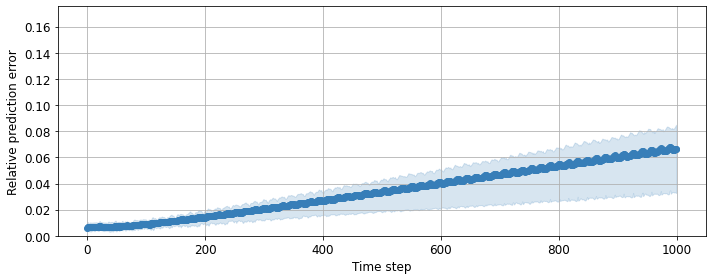

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.plot(error.mean(axis=0), 'o--', lw=3, label='', color='#377eb8')
plt.fill_between(x=range(error.shape[1]),y1=np.quantile(error, .05, axis=0), y2=np.quantile(error, .95, axis=0), color='#377eb8', alpha=0.2)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=10)

plt.ylabel('Relative prediction error', fontsize=12)
plt.xlabel('Time step', fontsize=12)
plt.grid()
#plt.yscale("log")
plt.ylim([0.0,error.max()*2])
#plt.legend(fontsize=22)
fig.tight_layout()

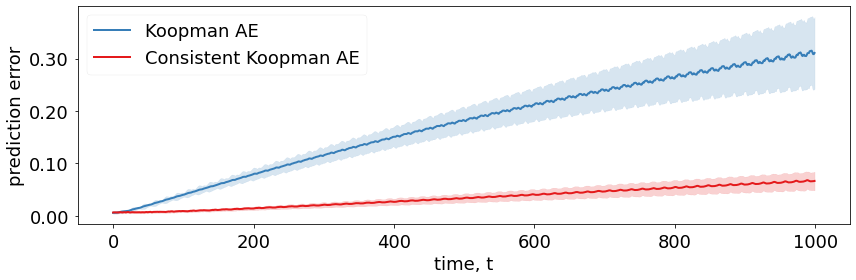

In [ ]:
import time
import argparse

import numpy as np

from scipy import stats
from scipy.stats import linregress

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.available
mpl.style.use('seaborn-paper') 


from matplotlib.ticker import StrMethodFormatter


result1 = np.load('results_pendulum/000_pred.npy')                  
result2 = np.load('results_back_pendulum/000_pred.npy')   

    
def moving_average(a, n=4) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n    
    

fig = plt.figure(figsize=(12,4))           

plt.plot(np.mean(result1, axis=0), '-', lw=2, label='Koopman AE', color='#377eb8')            
plt.fill_between(x=range(result1.shape[1]), y1=np.mean(result1, axis=0)-np.var(result1, axis=0)**0.5, y2=np.mean(result1, axis=0)+np.var(result1, axis=0)**0.5, color='#377eb8', alpha=0.2)         

plt.plot(np.mean(result2, axis=0), '-', lw=2, label='Consistent Koopman AE', color='#e41a1c')            
plt.fill_between(x=range(result2.shape[1]), y1=np.mean(result2, axis=0)-np.var(result2, axis=0)**0.5, y2=np.mean(result2, axis=0)+np.var(result2, axis=0)**0.5, color='#e41a1c', alpha=0.2)         
  
                 
plt.tick_params(axis='x', labelsize=18) 
plt.tick_params(axis='y', labelsize=18) 
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel('time, t',fontsize=18)
plt.ylabel('prediction error',fontsize=18)

plt.grid(False)
maxmax = np.maximum(result1.max(), result2.max())
plt.legend(fontsize=18, loc="upper left")
fig.tight_layout()  
plt.show()

In [ ]:
from torch import nn
import torch

def gaussian_init_(n_units, std=1):    
    sampler = torch.distributions.Normal(torch.Tensor([0]), torch.Tensor([std/n_units]))
    Omega = sampler.sample((n_units, n_units))[..., 0]  
    return Omega


class encoderNet(nn.Module):
    def __init__(self, m, n, b, ALPHA = 1):
        super(encoderNet, self).__init__()
        self.N = m * n
        self.tanh = nn.Tanh()

        self.fc1 = nn.Linear(self.N, 16*ALPHA)
        self.fc2 = nn.Linear(16*ALPHA, 16*ALPHA)
        self.fc3 = nn.Linear(16*ALPHA, b)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.0)          

    def forward(self, x):
        x = x.view(-1, 1, self.N)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))        
        x = self.fc3(x)
        
        return x


class decoderNet(nn.Module):
    def __init__(self, m, n, b, ALPHA = 1):
        super(decoderNet, self).__init__()

        self.m = m
        self.n = n
        self.b = b

        self.tanh = nn.Tanh()

        self.fc1 = nn.Linear(b, 16*ALPHA)
        self.fc2 = nn.Linear(16*ALPHA, 16*ALPHA)
        self.fc3 = nn.Linear(16*ALPHA, m*n)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.0)          

    def forward(self, x):
        x = x.view(-1, 1, self.b)
        x = self.tanh(self.fc1(x)) 
        x = self.tanh(self.fc2(x)) 
        x = self.tanh(self.fc3(x))
        x = x.view(-1, 1, self.m, self.n)
        return x



class dynamics(nn.Module):
    def __init__(self, b, init_scale):
        super(dynamics, self).__init__()
        self.dynamics = nn.Linear(b, b, bias=False)
        self.dynamics.weight.data = gaussian_init_(b, std=1)           
        U, _, V = torch.svd(self.dynamics.weight.data)
        self.dynamics.weight.data = torch.mm(U, V.t()) * init_scale

        
    def forward(self, x):
        x = self.dynamics(x)
        return x


class dynamics_back(nn.Module):
    def __init__(self, b, omega):
        super(dynamics_back, self).__init__()
        self.dynamics = nn.Linear(b, b, bias=False)
        self.dynamics.weight.data = torch.pinverse(omega.dynamics.weight.data.t())     

    def forward(self, x):
        x = self.dynamics(x)
        return x




class koopmanAE(nn.Module):
    def __init__(self, m, n, b, steps, steps_back, alpha = 1, init_scale=1):
        super(koopmanAE, self).__init__()
        self.steps = steps
        self.steps_back = steps_back
        
        self.encoder = encoderNet(m, n, b, ALPHA = alpha)
        self.dynamics = dynamics(b, init_scale)
        self.backdynamics = dynamics_back(b, self.dynamics)
        self.decoder = decoderNet(m, n, b, ALPHA = alpha)


    def forward(self, x, mode='forward'):
        out = []
        out_back = []
        z = self.encoder(x.contiguous())
        q = z.contiguous()

        
        if mode == 'forward':
            for _ in range(self.steps):
                q = self.dynamics(q)
                out.append(self.decoder(q))

            out.append(self.decoder(z.contiguous())) 
            return out, out_back    

        if mode == 'backward':
            for _ in range(self.steps_back):
                q = self.backdynamics(q)
                out_back.append(self.decoder(q))
                
            out_back.append(self.decoder(z.contiguous()))
            return out, out_back

In [ ]:
torch.set_printoptions(precision=5, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)

In [ ]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)
torch.mm(mat1, mat2)

tensor([[-1.72633e+00,  9.68112e-01, -3.34427e+00],
        [ 1.44779e+00,  1.37810e-03, -5.55197e-01]])

In [ ]:
mat2

tensor([[ 1.93867, -0.30452, -0.63231],
        [-0.76334, -0.37654,  0.40312],
        [ 1.05356, -1.13051,  2.38511]])

In [ ]:
torch.linalg.pinv(mat2)

tensor([[ 0.18921, -0.61645,  0.15435],
        [-0.96044, -2.26281,  0.12783],
        [-0.53882, -0.80025,  0.41168]])

In [ ]:
torch.mm ( torch.linalg.pinv(mat2)  , mat2)

tensor([[ 1.00000e+00,  2.52249e-07,  5.76408e-09],
        [-5.61099e-08,  1.00000e+00, -4.02409e-07],
        [-1.18771e-07,  5.07853e-07,  1.00000e+00]])

In [ ]:
torch.linalg.pinv(mat2) * mat2 , torch.linalg.pinv(mat2)[0,:] * mat2[0,:]

(tensor([[ 0.36682,  0.18772, -0.09760],
         [ 0.73315,  0.85204,  0.05153],
         [-0.56768,  0.90469,  0.98190]]),
 tensor([ 0.36682,  0.18772, -0.09760]))

In [ ]:
t = torch.tensor(range(16)).reshape(4,4)
b = t.view(2, 8)
t, b

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]]), tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
         [ 8,  9, 10, 11, 12, 13, 14, 15]]))

In [ ]:
t.storage().data_ptr() == b.storage().data_ptr()

True

In [ ]:
t = torch.tensor(range(16))
t = t.view(-1, 1, 16)
t , t.shape

(tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]]]),
 torch.Size([1, 1, 16]))

In [ ]:
a = torch.randn(5, 3)
u, s, v = torch.svd(a)
# usv=torch.mm(torch.mm(u,torch.diag(s)),v)
a, u, s, v
a.shape, u.shape, s.shape, v.shape, 

(torch.Size([5, 3]), torch.Size([5, 3]), torch.Size([3]), torch.Size([3, 3]))

In [ ]:
a = torch.tensor([1.,0.,0,0,2,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0]).reshape(4,5)
u, s, v = torch.svd(a)
print(a)
u, s, v


tensor([[1., 0., 0., 0., 2.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.]])


(tensor([[ 0.,  1.,  0.,  0.],
         [ 1.,  0.,  0.,  0.],
         [ 0.,  0.,  0., -1.],
         [ 0.,  0.,  1.,  0.]]),
 tensor([3.00000, 2.23607, 2.00000, 0.00000]),
 tensor([[-0.00000, 0.44721, -0.00000, 0.00000],
         [0.00000, -0.00000, 1.00000, 0.00000],
         [1.00000, -0.00000, 0.00000, 0.00000],
         [-0.00000, -0.00000, -0.00000, 1.00000],
         [0.00000, 0.89443, 0.00000, 0.00000]]))

In [ ]:
us=torch.mm(u, torch.diag(s))
us

tensor([[0.00000, 2.23607, 0.00000, 0.00000],
        [3.00000, 0.00000, 0.00000, 0.00000],
        [0.00000, 0.00000, 0.00000, 0.00000],
        [0.00000, 0.00000, 2.00000, 0.00000]])

In [ ]:
usv=torch.mm(us, torch.transpose(v,0,1))
usv

tensor([[1.00000, 0.00000, 0.00000, 0.00000, 2.00000],
        [0.00000, 0.00000, 3.00000, 0.00000, 0.00000],
        [0.00000, 0.00000, 0.00000, 0.00000, 0.00000],
        [0.00000, 2.00000, 0.00000, 0.00000, 0.00000]])

In [ ]:
# S=torch.zeros(a.shape)
# S[:s.shape[0], :s.shape[0]]=torch.diag(s)
# S

tensor([[3.00000, 0.00000, 0.00000, 0.00000, 0.00000],
        [0.00000, 2.23607, 0.00000, 0.00000, 0.00000],
        [0.00000, 0.00000, 2.00000, 0.00000, 0.00000],
        [0.00000, 0.00000, 0.00000, 0.00000, 0.00000]])

In [ ]:
import torch.nn.functional as F
source = torch.rand((3,5))
# now we expand to size (7, 11) by appending a row of 0s at pos 0 and pos 6, 
# and a column of 0s at pos 10
result = F.pad(input=source, pad=(1,1), mode='constant', value=0)
source , result

(tensor([[0.75496, 0.77474, 0.54668, 0.40003, 0.78064],
         [0.17175, 0.46356, 0.65824, 0.61673, 0.52250],
         [0.62219, 0.09732, 0.78926, 0.11160, 0.69098]]),
 tensor([[0.00000, 0.75496, 0.77474, 0.54668, 0.40003, 0.78064, 0.00000],
         [0.00000, 0.17175, 0.46356, 0.65824, 0.61673, 0.52250, 0.00000],
         [0.00000, 0.62219, 0.09732, 0.78926, 0.11160, 0.69098, 0.00000]]))

In [ ]:
# restrict parameters in a range
print(nn.utils.clip_grad_value_(t, clip_value=10))


None


In [ ]:
###training stage
import torch
from torch import nn
import numpy as np

from tools import *



def train(model, train_loader, lr, weight_decay, 
          lamb, num_epochs, learning_rate_change, epoch_update, 
          nu=0.0, eta=0.0, backward=0, steps=1, steps_back=1, gradclip=1):

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    device = get_device()
             
            
    def lr_scheduler(optimizer, epoch, lr_decay_rate=0.8, decayEpoch=[]):
                    """Decay learning rate by a factor of lr_decay_rate every lr_decay_epoch epochs"""
                    if epoch in decayEpoch:
                        for param_group in optimizer.param_groups:
                            param_group['lr'] *= lr_decay_rate
                        return optimizer
                    else:
                        return optimizer
                        
                     
        

    criterion = nn.MSELoss().to(device)


    epoch_hist = []
    loss_hist = []
    epoch_loss = []
                            
    for epoch in range(num_epochs):
        #print(epoch)
        for batch_idx, data_list in enumerate(train_loader):
            model.train()
            out, out_back = model(data_list[0].to(device), mode='forward')


            for k in range(steps):
                if k == 0:
                    loss_fwd = criterion(out[k], data_list[k+1].to(device))
                else:
                    loss_fwd += criterion(out[k], data_list[k+1].to(device))

            
            loss_identity = criterion(out[-1], data_list[0].to(device)) * steps

# wrong
            # loss_bwd = 0.0
            # loss_consist = 0.0

            loss_bwd = 0.0
            loss_consist = 0.0

            if backward == 1:
                out, out_back = model(data_list[-1].to(device), mode='backward')
   

                for k in range(steps_back):
                    
                    if k == 0:
                        loss_bwd = criterion(out_back[k], data_list[::-1][k+1].to(device))
                    else:
                        loss_bwd += criterion(out_back[k], data_list[::-1][k+1].to(device))
                        
                               
                A = model.dynamics.dynamics.weight
                B = model.backdynamics.dynamics.weight

                K = A.shape[-1]

                for k in range(1,K+1):
                    As1 = A[:,:k]
                    Bs1 = B[:k,:]
                    As2 = A[:k,:]
                    Bs2 = B[:,:k]

                    Ik = torch.eye(k).float().to(device)

                    if k == 1:
                        loss_consist = (torch.sum((torch.mm(Bs1, As1) - Ik)**2) + \
                                         torch.sum((torch.mm(As2, Bs2) - Ik)**2) ) / (2.0*k)
                    else:
                        loss_consist += (torch.sum((torch.mm(Bs1, As1) - Ik)**2) + \
                                         torch.sum((torch.mm(As2, Bs2)-  Ik)**2) ) / (2.0*k)


                
                
                
#                Ik = torch.eye(K).float().to(device)
#                loss_consist = (torch.sum( (torch.mm(A, B)-Ik )**2)**1 + \
#                                         torch.sum( (torch.mm(B, A)-Ik)**2)**1 )
#   
                                        
                
    
            loss = loss_fwd + lamb * loss_identity +  nu * loss_bwd + eta * loss_consist

            # ===================backward====================
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradclip) # gradient clip
            optimizer.step()           

        # schedule learning rate decay    
        lr_scheduler(optimizer, epoch, lr_decay_rate=learning_rate_change, decayEpoch=epoch_update)
        loss_hist.append(loss)                
        epoch_loss.append(epoch)
        
        
        if (epoch) % 20 == 0:
                print('********** Epoche %s **********' %(epoch+1))
                
                print("loss identity: ", loss_identity.item())
                if backward == 1:
                    print("loss backward: ", loss_bwd.item())
                    print("loss consistent: ", loss_consist.item())
                print("loss forward: ", loss_fwd.item())
                print("loss sum: ", loss.item())

                epoch_hist.append(epoch+1) 

                if hasattr(model.dynamics, 'dynamics'):
                    w, _ = np.linalg.eig(model.dynamics.dynamics.weight.data.cpu().numpy())
                    print(np.abs(w))


    if backward == 1:
        loss_consist = loss_consist.item()
                
                
    return model, optimizer, [epoch_hist, loss_fwd.item(), loss_consist]